In [6]:
import seaborn as sns
import bokeh.plotting as blt
import bokeh.models as bmod
import matplotlib as mpl
import matplotlib.cm as cm
from statsmodels.api import formula as sm

def standardize(x):
    '''Use on a pd.series'''
    
    mn = x.mean()
    sd = x.std()
    
    x2 = (x-mn)/sd
    
    return x2

In [7]:
site = 'P301'
method = '6'
exname = 'smex6'

In [8]:
data = pd.read_hdf('./data/%s_%s.hdf'%(site,exname),'df') # load the first experiment
data.peakSWE *= 1000. # convert m to mm
data.SMR *= 1000. # convert m/d to mm/d
data.MAP *= 1000. # convert m to mm

In [9]:
data.columns

Index([u'SMR', u'TpeakSWE', u'peakSWE', u'ablSeas', u'Tnosnow', u'ref',
       u'date_ONS', u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP',
       u'ET', u'Q', u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage',
       u'rz_drainage', u'unsat_storage', u'unsat_drainage', u'sat_def',
       u'sat_def_z'],
      dtype='object')

In [10]:
data['Pmodel'] = data['peakSWE'] + data['p'] # this is all of the precip data fed into the  model + peak swe
data['Pex'] = data['peakSWE'] + data['MAP'] # this is all of the precip that the model should see in liquid form + peak swe
data['wb'] = data['Pex'] - (data['ET']+data['Q'])
data['RR'] = data.Q/data.Pex
#data['Qerr'] = data.Q-data.streamflow
data['ablRR'] = data.Q/data.peakSWE

In [11]:
# create some normalized variables
data['SMR_peakSWE'] = data.SMR/data.peakSWE
data['SMR_TpeakSWE'] = data.SMR/data.TpeakSWE

# standardize variables
data['ablRR2'] = standardize(data.ablRR)
data['RR2'] = standardize(data.RR)
data['SMR2'] = standardize(data.SMR)
data['peakSWE2'] = standardize(data.peakSWE)
data['TpeakSWE2'] = standardize(data.TpeakSWE)
data['SMR_peakSWE2'] = standardize(data.SMR_peakSWE)
data['SMR_TpeakSWE2'] = standardize(data.SMR_TpeakSWE)

In [13]:
mod1 = sm.ols('ablRR2 ~ TpeakSWE2 + SMR2 + peakSWE2 + 1',data).fit()
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                 ablRR2   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 4.143e+04
Date:                Fri, 04 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:57:46   Log-Likelihood:                -39727.
No. Observations:               50000   AIC:                         7.946e+04
Df Residuals:                   49996   BIC:                         7.950e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8.393e-15      0.002   -3.5e-12      1.0

## Calculate some Color Metrics

In [5]:
data['Color'] = 'b'
data.loc[(data.SMR>190) & (data.RR>0.2),'Color'] = 'g'
data.loc[(data.SMR>150) & (data.RR<0.1),'Color'] = 'r' 

In [6]:
data['ASL'] = data.Tnosnow-data.TpeakSWE

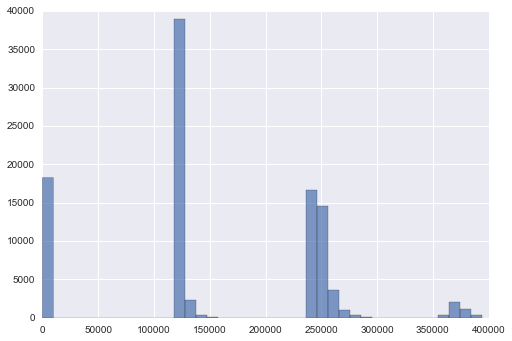

In [9]:
#plt.hist(data.Qout*366,40,alpha=0.7);
plt.hist(data.Q*366,40,alpha=0.7);

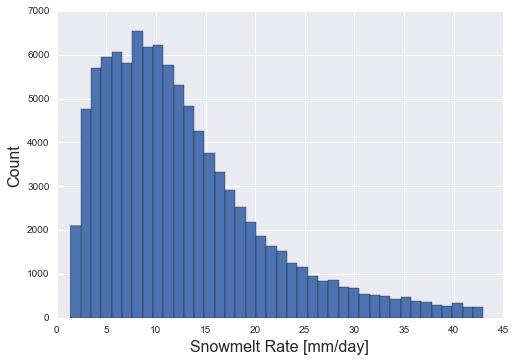

In [10]:
plt.hist(data.SMR,40);
plt.xlabel('Snowmelt Rate [mm/day]', fontsize=16)
plt.ylabel('Count',fontsize=16)

In [11]:
data['Color'] = 'green'

In [12]:
data.columns

Index([u'Tnosnow', u'TpeakSWE', u'peakSWE', u'SMR', u'ref', u'date_ONS',
       u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP', u'ET', u'Q',
       u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage', u'rz_drainage',
       u'unsat_storage', u'unsat_drainage', u'sat_def', u'sat_def_z',
       u'Pmodel', u'Pex', u'wb', u'RR', u'ablRR', u'Color', u'ASL'],
      dtype='object')

In [13]:
norm = mpl.colors.Normalize(vmin=data.ASL.min(), vmax=data.ASL.max())
cmap = cm.hot
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [14]:
tmp = []
for days in data.ASL:
    tmp.append(m.to_rgba(days))

In [16]:
data.ablRR.

,Tnosnow,TpeakSWE,peakSWE,SMR,ref,date_ONS,DOAS,date_AS,idx,date_peakSWE,...,rz_field_capacity,snow_melt,Pmodel,Pex,wb,RR,Qerr,ablRR,Color,ASL
0,183,158,50.000000,2.000000,2012,2012-03-31,15,2011-10-15,0,2012-03-06,...,1306.466947,0,50.000000,387.655296,374.576272,0,0,0,green,25
1,183,158,50.803213,2.032129,2012,2012-03-31,15,2011-10-15,1,2012-03-06,...,1306.466947,0,50.803213,388.458509,375.379485,0,0,0,green,25
2,183,158,51.606426,2.064257,2012,2012-03-31,15,2011-10-15,2,2012-03-06,...,1306.466947,0,51.606426,389.261722,376.182698,0,0,0,green,25
3,183,158,52.409639,2.096386,2012,2012-03-31,15,2011-10-15,3,2012-03-06,...,1306.466947,0,52.409639,390.064934,376.985910,0,0,0,green,25
4,183,158,53.212851,2.128514,2012,2012-03-31,15,2011-10-15,4,2012-03-06,...,1306.466947,0,53.212851,390.868147,377.789123,0,0,0,green,25


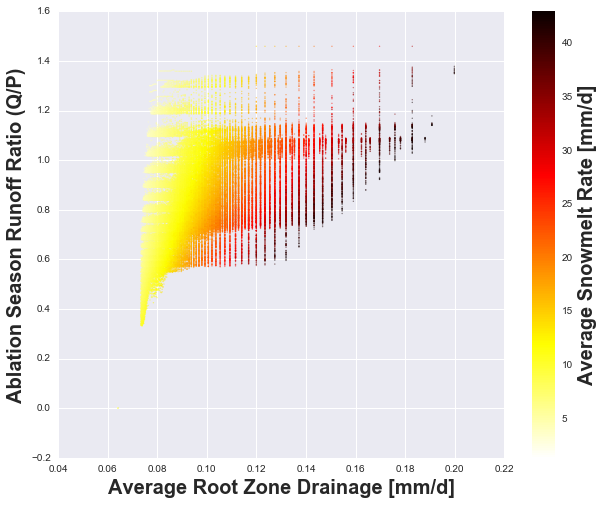

In [15]:
plt.figure(figsize=(10,8))
ykey = 'ablRR'
xkey = 'rz_drainage'
plt.scatter(data[xkey],data[ykey],s = 2, c = data.SMR,cmap='hot_r',edgecolor='none', alpha=0.5);
c = plt.colorbar();
c.set_label('Average Snowmelt Rate [mm/d]', fontsize = 20, weight = 'bold')
plt.xlabel('Average Root Zone Drainage [mm/d]',fontsize=20,weight='bold')
plt.ylabel('Ablation Season Runoff Ratio (Q/P)', fontsize=20,weight='bold')
#plt.ylim(0.4,1.1)
c.alpha=1
c.draw_all()
#plt.savefig('./figures/RR_ARD_SMR.png', dpi=300,bbox_inches='tight')

In [16]:
data.SMR.describe()

count    100220.000000
mean         12.708894
std           8.179742
min           1.366337
25%           6.656511
50%          10.888121
75%          16.537538
max          43.004769
Name: SMR, dtype: float64

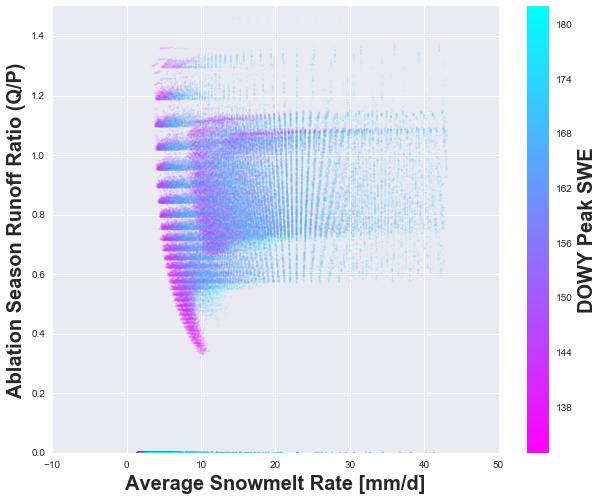

In [18]:
plt.figure(figsize=(10,8))
ykey = 'ablRR'
xkey = 'SMR'
plt.scatter(data[xkey],data[ykey],s = 4, c = data.TpeakSWE,cmap='cool_r',edgecolor='none',alpha = 0.1);
c = plt.colorbar();
c.set_label('DOWY Peak SWE', fontsize = 20, weight = 'bold')
plt.xlabel('Average Snowmelt Rate [mm/d]',fontsize=20,weight='bold')
plt.ylabel('Ablation Season Runoff Ratio (Q/P)', fontsize=20,weight='bold')
plt.ylim(0.0,1.5)
c.alpha=1
c.draw_all()
#plt.savefig('./figures/smex2_RR_SMR_DOWPEAKSWE.png', dpi=300,bbox_inches='tight')

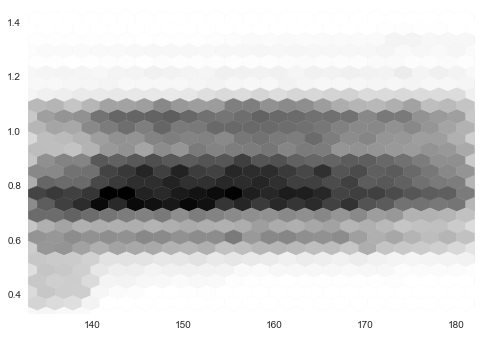

In [33]:
tmp = data.loc[data.ablRR>0]
plt.hexbin(tmp.TpeakSWE,tmp.ablRR,gridsize=25)

In [19]:
import time
from IPython.display import clear_output
import matplotlib.animation as animation

In [20]:
data.TpeakSWE.max()

182.0

(0, 1.5)

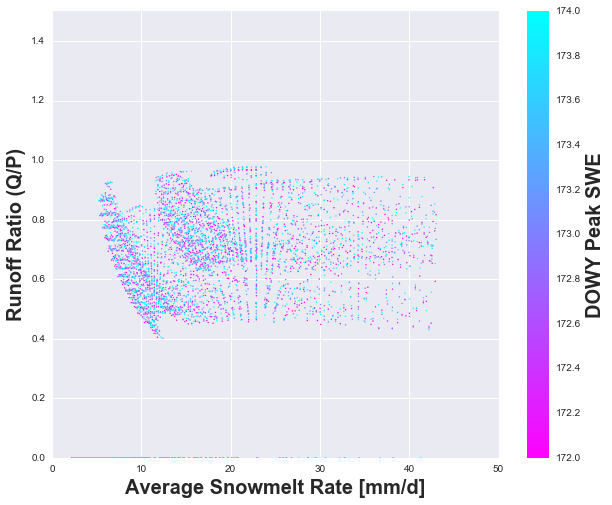

In [22]:
plt.figure(figsize=(10,8))
tmp = data.loc[(data.TpeakSWE >= 172) & (data.TpeakSWE<=174)]
ykey = 'RR'
xkey = 'SMR'

p = plt.scatter(tmp[xkey],tmp[ykey],s = 2, c = tmp.TpeakSWE,cmap='cool_r',edgecolor='none',alpha = 1);
c = plt.colorbar()
c.set_label('DOWY Peak SWE', fontsize = 20, weight = 'bold')
plt.xlabel('Average Snowmelt Rate [mm/d]',fontsize=20,weight='bold')
plt.ylabel('Runoff Ratio (Q/P)', fontsize=20,weight='bold')
plt.ylim(0,1.5)
#plt.savefig('./figures/smex2_RR_SMR_DOWPEAKSWE_d4.png', dpi=300,bbox_inches='tight')

In [15]:
tmp = data.loc[(data.RR>0.29) & (data.RR<0.31) & (data.SMR >6.) & (data.SMR <8.)]

In [180]:
len(tmp)

1547

In [17]:
data.columns

Index([u'Tnosnow', u'TpeakSWE', u'peakSWE', u'SMR', u'ref', u'date_ONS',
       u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP', u'ET', u'Q',
       u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage', u'rz_drainage',
       u'unsat_storage', u'unsat_drainage', u'sat_def', u'sat_def_z', u'Qin',
       u'Qout', u'streamflow', u'rz_field_capacity', u'snow_melt', u'Pmodel',
       u'Pex', u'wb', u'RR', u'Qerr', u'Color', u'ASL'],
      dtype='object')

In [172]:
data.loc[data.idx==1000]

,Tnosnow,TpeakSWE,peakSWE,SMR,ref,date_ONS,DOAS,date_AS,idx,date_peakSWE,...,Qout,streamflow,rz_field_capacity,snow_melt,Pmodel,Pex,wb,RR,Color,ASL
1000,238,172,325.21875,4.927557,2008,2008-05-25,15,2007-10-15,1000,2008-03-20,...,0.463938,0.463938,372.56662,325.21874,1016.312398,613.41875,-159.647362,0.370658,green,66


In [164]:
data['Color']

0        b
1        b
2        b
3        b
4        b
5        b
6        b
7        b
8        b
9        b
10       b
11       b
12       b
13       b
14       b
15       b
16       b
17       b
18       b
19       b
20       b
21       b
22       b
23       b
24       b
25       b
26       b
27       b
28       b
29       b
        ..
29470    b
29471    b
29472    b
29473    b
29474    b
29475    b
29476    b
29477    b
29478    b
29479    b
29480    b
29481    b
29482    b
29483    b
29484    b
29485    b
29486    b
29487    b
29488    b
29489    b
29490    b
29491    b
29492    b
29493    b
29494    b
29495    b
29496    b
29497    b
29498    b
29499    b
Name: Color, dtype: object

(0, 190)

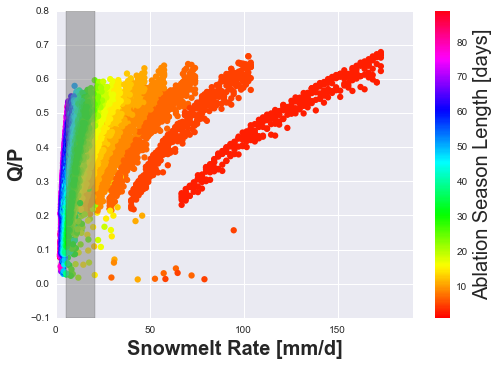

In [48]:
plt.axvspan(niwot.averageMR.min(), niwot.averageMR.max(), facecolor='0.5', alpha=0.5)
plt.scatter(data.SMR,data.RR,s = 40,lw=2,c=data.ASL, edgecolor='none',cmap='hsv')
plt.ylabel('Q/P', fontsize=20, weight='bold')
plt.xlabel('Snowmelt Rate [mm/d]', fontsize = 20, weight = 'bold')
cb = plt.colorbar()
cb.set_label('Ablation Season Length [days]', fontsize = 20)
plt.xlim(0,190)

In [22]:
data.loc[(data.SMR>150) & (data.RR<0.1),'Color'] = 'r' 

In [32]:
data.loc[(data.SMR>190) & (data.RR>0.2),'Color'] = 'g'

In [31]:
data.loc[(data.SMR>150) & (data.RR<0.1)].sort(columns='SMR').Pex

28700    495.400000
26952    517.179592
27854    521.359184
26006    571.938776
28706    534.338776
26957    549.628571
26959    562.608163
28712    573.277551
28713    579.767347
27866    599.236735
28717    605.726531
27869    618.706122
26019    656.306122
25020    671.795918
26972    646.975510
27875    657.644898
27877    670.624490
25029    730.204082
25031    743.183673
26982    711.873469
27884    716.053061
27887    735.522449
26988    750.812245
26989    757.302041
25039    795.102041
27889    748.502041
26992    776.771429
26043    812.061224
27893    774.461224
26995    796.240816
25045    834.040816
28745    787.440816
26047    838.020408
Name: Pex, dtype: float64

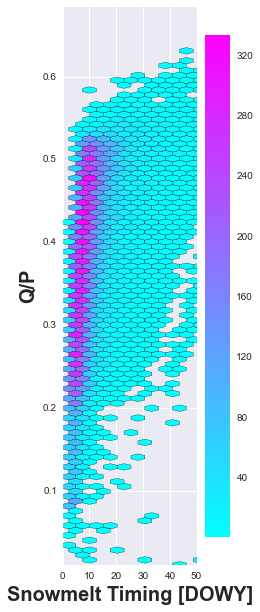

In [59]:
plt.figure(figsize=(3,10))
plt.hexbin(data.SMR,data.RR,gridsize=100,edgecolor='k',cmap='cool', mincnt=1)
plt.ylabel('Q/P', fontsize=20, weight='bold')
plt.xlabel('Snowmelt Timing [DOWY]', fontsize = 20, weight = 'bold')
plt.xlim(0,50)
cb = plt.colorbar()

In [34]:
data.loc[(data.SMR>190) & (data.RR>0.2)]

,Tnosnow,TpeakSWE,peakSWE,SMR,ref,date_ONS,DOAS,date_AS,idx,MAP,...,Qbf,Qrf,rech,sat,p,Pmodel,Pex,wb,RR,Color
25000,223,222,201.000000,201.000000,2008,2008-05-10,15,2007-10-15,25000,341.0,...,139.357183,0,417.123035,0,900.382448,1101.382448,542.000000,-183.358325,0.257117,g
25001,223,222,207.489796,207.489796,2008,2008-05-10,15,2007-10-15,25001,341.0,...,146.411674,0,422.963855,0,900.382448,1107.872244,548.489796,-183.923020,0.266936,g
25002,223,222,213.979592,213.979592,2008,2008-05-10,15,2007-10-15,25002,341.0,...,153.233778,0,428.804666,0,900.382448,1114.362040,554.979592,-184.255328,0.276107,g
25003,223,222,220.469388,220.469388,2008,2008-05-10,15,2007-10-15,25003,341.0,...,159.984386,0,434.645486,0,900.382448,1120.851836,561.469388,-184.516140,0.284939,g
25004,223,222,226.959184,226.959184,2008,2008-05-10,15,2007-10-15,25004,341.0,...,166.752858,0,440.486297,0,900.382448,1127.341632,567.959184,-184.794816,0.293600,g
25005,223,222,233.448980,233.448980,2008,2008-05-10,15,2007-10-15,25005,341.0,...,177.114349,0,446.327117,0,900.382448,1133.831428,574.448980,-188.666511,0.308320,g
25006,223,222,239.938776,239.938776,2008,2008-05-10,15,2007-10-15,25006,341.0,...,188.548379,0,452.167937,0,900.382448,1140.321224,580.938776,-193.610745,0.324558,g
25007,223,222,246.428571,246.428571,2008,2008-05-10,15,2007-10-15,25007,341.0,...,199.535527,0,458.008748,0,900.382448,1146.811019,587.428571,-198.108098,0.339676,g
25008,223,222,252.918367,252.918367,2008,2008-05-10,15,2007-10-15,25008,341.0,...,208.341835,0,463.849568,0,900.382448,1153.300815,593.918367,-200.424610,0.350792,g
25009,223,222,259.408163,259.408163,2008,2008-05-10,15,2007-10-15,25009,341.0,...,217.076641,0,469.690379,0,900.382448,1159.790611,600.408163,-202.669620,0.361548,g


In [126]:
import statsmodels.formula.api as sm

In [127]:
print niwot.averageMR.min()
print niwot.averageMR.max()

5.72340425532
20.6666666667


In [128]:
data['ln_SMR'] = np.log(data.SMR)

In [134]:
data2 = pd.DataFrame()

keys = ['RR','Tnosnow','SMR','TpeakSWE','ln_SMR','sat_def','rz_drainage','peakSWE']

for key in keys:    
    data2[key] = standardize(data[key])

## Clean Data

In [135]:
data2.head()

,RR,Tnosnow,SMR,TpeakSWE,ln_SMR,sat_def,rz_drainage,peakSWE
0,-1.154629,-2.015366,-1.362972,-1.515445,-1.558162,1.037336,-1.026354,-1.575383
1,-1.087629,-2.015366,-1.324488,-1.515445,-1.490949,0.991725,-0.974693,-1.521187
2,-1.023433,-2.015366,-1.286004,-1.515445,-1.425338,0.945222,-0.921988,-1.466990
3,-0.974118,-2.015366,-1.247521,-1.515445,-1.361254,0.898910,-0.868492,-1.412794
4,-0.897325,-2.015366,-1.209037,-1.515445,-1.298629,0.841334,-0.818029,-1.358598


In [131]:
data2['sat_def2'] = data2.sat_def**2

In [139]:
mod1 = sm.ols('RR ~ SMR + Tnosnow + TpeakSWE + peakSWE +1',data2).fit()
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                     RR   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.308e+05
Date:                Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                        11:13:35   Log-Likelihood:                -30431.
No. Observations:              106676   AIC:                         6.087e+04
Df Residuals:                  106671   BIC:                         6.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.805e-15      0.001   9.95e-12      1.0

In [140]:
mod2 = sm.ols('SMR ~ peakSWE +1',data2).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                    SMR   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                 3.066e+04
Date:                Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                        11:13:36   Log-Likelihood:            -1.3789e+05
No. Observations:              106676   AIC:                         2.758e+05
Df Residuals:                  106674   BIC:                         2.758e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.672e-15      0.003   2.47e-12      1.0

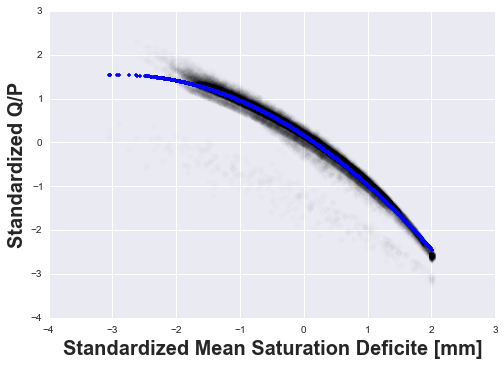

In [47]:
plt.plot(data2.sat_def,data2.RR,'ok', alpha = 0.01)
plt.plot(mod.model.data.exog[:,1],mod.fittedvalues,'.b')
plt.xlabel('Standardized Mean Saturation Deficite [mm]', fontsize=20, weight='bold')
plt.ylabel('Standardized Q/P', fontsize=20,weight='bold')

In [43]:
x = np.linspace(-4,3,1000)
xnew = np.c_[np.ones_like(x),x,x**2,]

In [46]:
1.23126917**2

1.516023768992489

In [42]:
mod.model.data.exog

array([[ 1.        ,  1.23126917,  1.51602378],
       [ 1.        ,  1.1454793 ,  1.31212284],
       [ 1.        ,  1.09894107,  1.20767148],
       ..., 
       [ 1.        , -1.13064183,  1.27835096],
       [ 1.        , -1.32309526,  1.75058107],
       [ 1.        , -1.10173032,  1.21380969]])

In [45]:
xnew

array([[  1.        ,  -4.        ,  16.        ],
       [  1.        ,  -3.99299299,  15.94399304],
       [  1.        ,  -3.98598599,  15.88808428],
       ..., 
       [  1.        ,   2.98598599,   8.91611231],
       [  1.        ,   2.99299299,   8.95800706],
       [  1.        ,   3.        ,   9.        ]])

In [44]:
mod.predict(xnew)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
import glob

In [52]:
files = glob.glob('/Volumes/data/RHESSys_out/smex2/smex2_*_patch.daily')

In [53]:
files

['/Volumes/data/RHESSys_out/smex2/smex2_0_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10000_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10001_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10002_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10003_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10004_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10005_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10006_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10007_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10008_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10009_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_1000_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10010_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10011_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10012_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10013_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10014

In [54]:
fl = files[-10]

In [56]:
int(fl.split('_')[-2])

'9993'

In [145]:
tmp = pd.read_table(fl, delim_whitespace=True)

In [148]:
print list(tmp.columns)

['day', 'month', 'year', 'basinID', 'hillID', 'zoneID', 'patchID', 'rain_thr', 'detention_store', 'sat_def_z', 'sat_def', 'rz_storage', 'potential_rz_store', 'rz_field_capacity', 'rz_wilting_point', 'unsat_stor', 'rz_drainage', 'unsat_drain', 'sublimation', 'return', 'evap', 'evap_surface', 'soil_evap', 'snow', 'snow_melt', 'trans_sat', 'trans_unsat', 'Qin', 'Qout', 'psn', 'root_zone.S', 'root.depth', 'litter.rain_stor', 'litter.S', 'area', 'pet', 'lai', 'baseflow', 'streamflow', 'pcp', 'recharge', 'Kdowndirpch', 'Kdowndiffpch', 'Kupdirpch', 'Kupdifpch', 'Luppch', 'Kdowndirsubcan', 'Kdowndifsubcan', 'Ldownsubcan', 'Kstarcan', 'Kstardirsno', 'Kstardiffsno', 'Lstarcanopy', 'Lstarsnow', 'Lstarsoil', 'wind', 'windsnow', 'windzone', 'ga', 'gasnow', 'trans_reduc_perc', 'pch_field_cap', 'overland_flow', 'height', 'ustar', 'snow_albedo', 'Kstarsoil', 'Kdowndirsurf', 'Kdowndifsurf', 'exfil_unsat', 'snow_Rnet', 'snow_QLE', 'snow_QH', 'snow_Qrain', 'snow_Qmelt', 'LEcanopy', 'SED', 'snow_age']


In [ ]:
def process_Patch(fl):
    
    num = int(fl.split('_')[-2]) # split out the file number
    
    data = pd.read_table(fl, delim_whitespace=True) # load the patch data
    
    rz_storage = data.rz_storage.mean() # root zone storage
    rz_field_capacity = data.rz_field_capacity.mean() # root zone field capacity
    rz_drainage = data.rz_drainage.mean() # root zone drainage 
    unsat_drainage = data.unsat_drain.mean() # unsaturated zone drainage
    sat_def = data.sat_def.mean() # saturation deficite (mm)
    sat_def_z = data.sat_def_z.mean() # saturation deficite depth, is this the depth to ground water?
    
    
    
    